In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Q1 Dataframe

TED = pd.read_csv('20221013_ted_talks.csv')

TED =TED.dropna()

TED['recorded_year']=''
for i in range(0, len(TED)):
    TED.iat[i,9] = TED.iat[i,3][:-6]

TED['published_year']=''
for i in range(0, len(TED)):
    TED.iat[i,10] = TED.iat[i,4][:-6]


TED['recorded_year'] = pd.to_numeric(TED['recorded_year'])

views= TED['views'].tolist()

TED["Notes"] = pd.cut(
    x=TED["recorded_year"],
    bins=[0, 2000, 2010, np.inf],
    labels=["Very Old", "Old", "New"],
)

TED

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,recorded_year,published_year,Notes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,2006,2006,Old
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,2006,2006,Old
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,2006,2006,Old
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,2006,2006,Old
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,2006,2006,Old
...,...,...,...,...,...,...,...,...,...,...,...,...
5696,98707,Is inequality inevitable?,TED-Ed,2022-10-11,2022-10-11,TED-Ed,390,109948,3200,2022,2022,New
5697,98662,4 ways to design a disability-friendly future,Meghan Hussey,2022-09-08,2022-10-11,TED Salon Bezos Scholars,544,310241,9300,2022,2022,New
5698,98383,"Can exercise actually ""boost"" your metabolism?",Jen Gunter,2022-10-12,2022-10-12,Body Stuff with Dr. Jen Gunter,210,30087,902,2022,2022,New
5699,98706,How did they build the Great Pyramid of Giza?,Soraya Field Fiorio,2022-10-13,2022-10-13,TED-Ed,332,456,13,2022,2022,New


# iii.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
l = TED['event'].value_counts(0).sort_values().head(600)
ls =np.array(l.index)
TED = TED.drop(TED[TED.event.isin(ls)].index)

#This removes the 600 values in the df so that only the events that had more than 40 talks remain

TED

,talk_id,title,speaker,recorded_date,published_date,event,duration,views,likes,recorded_year,published_year,Notes
0,1,Averting the climate crisis,Al Gore,2006-02-25,2006-06-27,TED2006,957,3681537,110000,2006,2006,Old
1,7,Simplicity sells,David Pogue,2006-02-24,2006-06-27,TED2006,1266,2012797,60000,2006,2006,Old
2,53,Greening the ghetto,Majora Carter,2006-02-26,2006-06-27,TED2006,1096,3006315,90000,2006,2006,Old
3,92,The best stats you've ever seen,Hans Rosling,2006-02-22,2006-06-27,TED2006,1176,15432904,462000,2006,2006,Old
4,66,Do schools kill creativity?,Sir Ken Robinson,2006-02-25,2006-06-27,TED2006,1151,73935964,2200000,2006,2006,Old
...,...,...,...,...,...,...,...,...,...,...,...,...
5692,97536,You don't actually know what your future self ...,Shankar Vedantam,2022-04-10,2022-10-06,TED2022,848,523664,15000,2022,2022,New
5694,98591,Climate action's hidden opportunities for women,Zineb Sqalli,2022-09-15,2022-10-07,TED@BCG,734,495327,14000,2022,2022,New
5695,95723,The benefits of not being a jerk to yourself,Dan Harris,2022-04-10,2022-10-10,TED2022,819,574997,17000,2022,2022,New
5696,98707,Is inequality inevitable?,TED-Ed,2022-10-11,2022-10-11,TED-Ed,390,109948,3200,2022,2022,New


In [ ]:
X_part1 = TED[['duration', 'views' ]]

In [ ]:
y = TED['likes']

In [ ]:
X_part2 = TED['event']

In [ ]:
X_part2 = pd.get_dummies(X_part2)

In [ ]:
X_part2

,Countdown,Countdown Summit,TED Residency,TED-Ed,TED2006,TED2007,TED2008,TED2009,TED2010,TED2011,...,TEDGlobal 2012,TEDGlobal 2013,TEDGlobal 2014,TEDGlobal 2017,TEDMonterey,TEDSummit 2019,TEDWomen 2018,TEDxBeaconStreet,TEDxMidAtlantic,TEDxMileHigh
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5696,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = pd.concat([X_part1,X_part2], axis=1 )

In [ ]:
X = X.dropna()

In [ ]:
X

,duration,views,Countdown,Countdown Summit,TED Residency,TED-Ed,TED2006,TED2007,TED2008,TED2009,...,TEDGlobal 2012,TEDGlobal 2013,TEDGlobal 2014,TEDGlobal 2017,TEDMonterey,TEDSummit 2019,TEDWomen 2018,TEDxBeaconStreet,TEDxMidAtlantic,TEDxMileHigh
0,957,3681537,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1266,2012797,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1096,3006315,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1176,15432904,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1151,73935964,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,848,523664,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5694,734,495327,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5695,819,574997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5696,390,109948,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
train_rmse =[]
test_rmse = []

In [ ]:
for d in range(1,4):

    model = PolynomialFeatures(degree =d)
    Extended_X = model.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(Extended_X, y, test_size=0.3, random_state=101)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #feature scaling can ruin the interpretability of a model?

    my_model = LinearRegression()
    my_model.fit(X_train, y_train)

    train_pred = my_model.predict(X_train)
    test_pred = my_model.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

In [ ]:
train_rmse

[2958.7046763294447, 903.4345526526002, 334.03331773273607]

In [ ]:
test_rmse

[2393.6707018999987, 3650.5906023385114, 13471.31847363165]

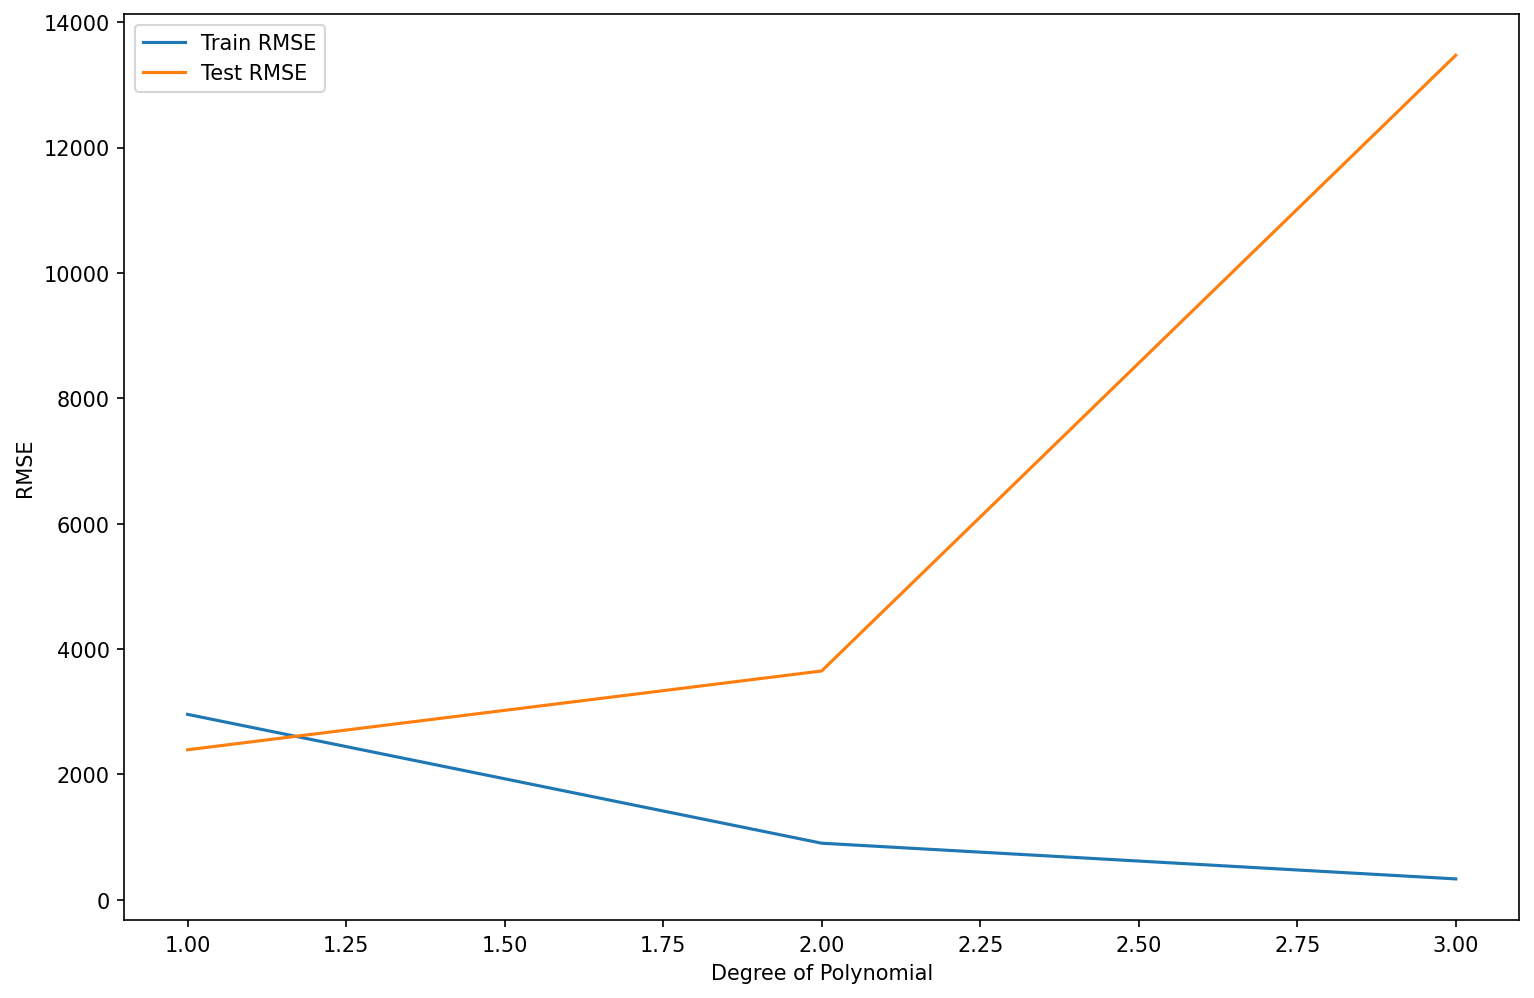

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
plt.plot(range(1,4), train_rmse[:3], label = 'Train RMSE')
plt.plot(range(1,4), test_rmse[:3], label = 'Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()



In [ ]:
model = PolynomialFeatures(degree =1) #lowest Test RMSE and low MAE
Extended_X = model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Extended_X, y, test_size=0.3, random_state=101)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


my_model = LinearRegression()
my_model.fit(X_train, y_train)

y_hat = my_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_hat)
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))

In [ ]:
RMSE #validation error

2393.6707018999987

In [ ]:
MAE #validation error

1188.5454531618843

In [ ]:
TED['likes'].mean()

72787.70616264295

In [ ]:
mean = TED['likes'].mean()

In [ ]:
(RMSE/mean)*100 #error range

3.288564550380775

# 2393 RMSE
# 1188 MAE
# 3% error range